# Artificial Intelligence Nanodegree

## Voice User Interfaces

## Project: Speech Recognition with Neural Networks

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following blocks of code will require additional functionality which you must provide. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

---

## Introduction  

In this notebook, you will build a deep neural network that functions as part of an end-to-end automatic speech recognition (ASR) pipeline!  Your completed pipeline will accept raw audio as input and return a predicted transcription of the spoken language.  The full pipeline is summarized in the figure below.

<img src="images/pipeline.png">

- **STEP 1** is a pre-processing step that converts raw audio to one of two feature representations that are commonly used for ASR. 
- **STEP 2** is an acoustic model which accepts audio features as input and returns a probability distribution over all potential transcriptions.  After learning about the basic types of neural networks that are often used for acoustic modeling, you will engage in your own investigations, to design your own acoustic model!
- **STEP 3** in the pipeline takes the output from the acoustic model and returns a predicted transcription.  

Feel free to use the links below to navigate the notebook:
- [The Data](#thedata)
- [**STEP 1**](#step1): Acoustic Features for Speech Recognition
- [**STEP 2**](#step2): Deep Neural Networks for Acoustic Modeling
    - [Model 0](#model0): RNN
    - [Model 1](#model1): RNN + TimeDistributed Dense
    - [Model 2](#model2): CNN + RNN + TimeDistributed Dense
    - [Model 3](#model3): Deeper RNN + TimeDistributed Dense
    - [Model 4](#model4): Bidirectional RNN + TimeDistributed Dense
    - [Models 5+](#model5)
    - [Compare the Models](#compare)
    - [Final Model](#final)
- [**STEP 3**](#step3): Obtain Predictions

<a id='thedata'></a>
## The Data

We begin by investigating the dataset that will be used to train and evaluate your pipeline.  [LibriSpeech](http://www.danielpovey.com/files/2015_icassp_librispeech.pdf) is a large corpus of English-read speech, designed for training and evaluating models for ASR.  The dataset contains 1000 hours of speech derived from audiobooks.  We will work with a small subset in this project, since larger-scale data would take a long while to train.  However, after completing this project, if you are interested in exploring further, you are encouraged to work with more of the data that is provided [online](http://www.openslr.org/12/).

In the code cells below, you will use the `vis_train_features` module to visualize a training example.  The supplied argument `index=0` tells the module to extract the first example in the training set.  (You are welcome to change `index=0` to point to a different training example, if you like, but please **DO NOT** amend any other code in the cell.)  The returned variables are:
- `vis_text` - transcribed text (label) for the training example.
- `vis_raw_audio` - raw audio waveform for the training example.
- `vis_mfcc_feature` - mel-frequency cepstral coefficients (MFCCs) for the training example.
- `vis_spectrogram_feature` - spectrogram for the training example. 
- `vis_audio_path` - the file path to the training example.

## Downloading data

* wget http://www.openslr.org/resources/12/dev-clean.tar.gz

* tar -xzvf dev-clean.tar.gz
* wget http://www.openslr.org/resources/12/test-clean.tar.gz

* tar -xzvf test-clean.tar.gz

# Converting .flac to .wav


script was found in [covert flac to wav](https://unix.stackexchange.com/questions/341436/a-script-to-convert-flac-files-to-wav-is-not-working)

In [ ]:
# import os
# import subprocess

# for root, dirs, files in os.walk("../../Data/speech2text_data/data/LibriSpeech/test-clean/"):
#     if len(root.split("/")) == 9:
#         root = root + '/'
#         print(root)
#         subprocess.call(['./flac_to_wav.sh', root]) 

In [ ]:
# import os
# import subprocess

# for root, dirs, files in os.walk("../../Data/speech2text_data/data/LibriSpeech/dev-clean/"):
#     if len(root.split("/")) == 9:
#         root = root + '/'
#         print(root)
#         subprocess.call(['./flac_to_wav.sh', root]) 

### updating the json files provided in the root.
i decided it is easier to modify the existing ones than to use the provided tool in the class to generate one from scratch

In [ ]:
# import json
# DATA_FILENAME = "./valid_corpus_updated.json"
# files_new_location_list = "../../Data/speech2text_data/data/LibriSpeech/test-clean".split("/")
# with open(DATA_FILENAME, mode='w', encoding='utf-8') as feedsjson:
#     with open("./valid_corpus.json") as json_file:
#         for line in json_file:
#             validation_json = json.loads(line)
#             file_old_location_list = validation_json["key"].split("/")
#             file_old_location_list[:5] = files_new_location_list
#             file_new_location =  "/".join(file_old_location_list)
#             validation_json["key"] = file_new_location
#             json.dump(validation_json, feedsjson)
#             feedsjson.write('\n')


In [ ]:
# import json
# DATA_FILENAME = "./train_corpus_updated.json"
# files_new_location_list = "../../Data/speech2text_data/data/LibriSpeech/dev-clean".split("/")
# with open(DATA_FILENAME, mode='w', encoding='utf-8') as feedsjson:
#     with open("./train_corpus.json") as json_file:
#         for line in json_file:
#             validation_json = json.loads(line)
#             file_old_location_list = validation_json["key"].split("/")
#             file_old_location_list[:5] = files_new_location_list
#             file_new_location =  "/".join(file_old_location_list)
#             validation_json["key"] = file_new_location
#             json.dump(validation_json, feedsjson)
#             feedsjson.write('\n')

In [ ]:
from data_generator import vis_train_features

# extract label and audio features for a single training example
vis_text, vis_raw_audio, vis_mfcc_feature, vis_spectrogram_feature, vis_audio_path = vis_train_features()

The following code cell visualizes the audio waveform for your chosen example, along with the corresponding transcript.  You also have the option to play the audio in the notebook!

In [ ]:
from IPython.display import Markdown, display
from data_generator import vis_train_features, plot_raw_audio
from IPython.display import Audio
%matplotlib inline

# plot audio signal
plot_raw_audio(vis_raw_audio)
# print length of audio signal
display(Markdown('**Shape of Audio Signal** : ' + str(vis_raw_audio.shape)))
# print transcript corresponding to audio clip
display(Markdown('**Transcript** : ' + str(vis_text)))
# play the audio file
Audio(vis_audio_path)

<a id='step1'></a>
## STEP 1: Acoustic Features for Speech Recognition

For this project, you won't use the raw audio waveform as input to your model.  Instead, we provide code that first performs a pre-processing step to convert the raw audio to a feature representation that has historically proven successful for ASR models.  Your acoustic model will accept the feature representation as input.

In this project, you will explore two possible feature representations.  _After completing the project_, if you'd like to read more about deep learning architectures that can accept raw audio input, you are encouraged to explore this [research paper](https://pdfs.semanticscholar.org/a566/cd4a8623d661a4931814d9dffc72ecbf63c4.pdf).

### Spectrograms

The first option for an audio feature representation is the [spectrogram](https://www.youtube.com/watch?v=_FatxGN3vAM).  In order to complete this project, you will **not** need to dig deeply into the details of how a spectrogram is calculated; but, if you are curious, the code for calculating the spectrogram was borrowed from [this repository](https://github.com/baidu-research/ba-dls-deepspeech).  The implementation appears in the `utils.py` file in your repository.

The code that we give you returns the spectrogram as a 2D tensor, where the first (_vertical_) dimension indexes time, and the second (_horizontal_) dimension indexes frequency.  To speed the convergence of your algorithm, we have also normalized the spectrogram.  (You can see this quickly in the visualization below by noting that the mean value hovers around zero, and most entries in the tensor assume values close to zero.)

In [ ]:
from data_generator import plot_spectrogram_feature

# plot normalized spectrogram
plot_spectrogram_feature(vis_spectrogram_feature)
# print shape of spectrogram
display(Markdown('**Shape of Spectrogram** : ' + str(vis_spectrogram_feature.shape)))

### Mel-Frequency Cepstral Coefficients (MFCCs)

The second option for an audio feature representation is [MFCCs](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum).  You do **not** need to dig deeply into the details of how MFCCs are calculated, but if you would like more information, you are welcome to peruse the [documentation](https://github.com/jameslyons/python_speech_features) of the `python_speech_features` Python package.  Just as with the spectrogram features, the MFCCs are normalized in the supplied code.

The main idea behind MFCC features is the same as spectrogram features: at each time window, the MFCC feature yields a feature vector that characterizes the sound within the window.  Note that the MFCC feature is much lower-dimensional than the spectrogram feature, which could help an acoustic model to avoid overfitting to the training dataset. 

In [ ]:
from data_generator import plot_mfcc_feature

# plot normalized MFCC
plot_mfcc_feature(vis_mfcc_feature)
# print shape of MFCC
display(Markdown('**Shape of MFCC** : ' + str(vis_mfcc_feature.shape)))

When you construct your pipeline, you will be able to choose to use either spectrogram or MFCC features.  If you would like to see different implementations that make use of MFCCs and/or spectrograms, please check out the links below:
- This [repository](https://github.com/baidu-research/ba-dls-deepspeech) uses spectrograms.
- This [repository](https://github.com/mozilla/DeepSpeech) uses MFCCs.
- This [repository](https://github.com/buriburisuri/speech-to-text-wavenet) also uses MFCCs.
- This [repository](https://github.com/pannous/tensorflow-speech-recognition/blob/master/speech_data.py) experiments with raw audio, spectrograms, and MFCCs as features.

<a id='step2'></a>
## STEP 2: Deep Neural Networks for Acoustic Modeling

In this section, you will experiment with various neural network architectures for acoustic modeling.  

You will begin by training five relatively simple architectures.  **Model 0** is provided for you.  You will write code to implement **Models 1**, **2**, **3**, and **4**.  If you would like to experiment further, you are welcome to create and train more models under the **Models 5+** heading.  

All models will be specified in the `sample_models.py` file.  After importing the `sample_models` module, you will train your architectures in the notebook.

After experimenting with the five simple architectures, you will have the opportunity to compare their performance.  Based on your findings, you will construct a deeper architecture that is designed to outperform all of the shallow models.

For your convenience, we have designed the notebook so that each model can be specified and trained on separate occasions.  That is, say you decide to take a break from the notebook after training **Model 1**.  Then, you need not re-execute all prior code cells in the notebook before training **Model 2**.  You need only re-execute the code cell below, that is marked with **`RUN THIS CODE CELL IF YOU ARE RESUMING THE NOTEBOOK AFTER A BREAK`**, before transitioning to the code cells corresponding to **Model 2**.

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


#####################################################################
# RUN THIS CODE CELL IF YOU ARE RESUMING THE NOTEBOOK AFTER A BREAK #
#####################################################################

# allocate 50% of GPU memory (if you like, feel free to change this)
from keras.backend.tensorflow_backend import set_session
import tensorflow as tf 
# config = tf.ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 1.0
# set_session(tf.Session(config=config))

# watch for any changes in the sample_models module, and reload it automatically
%load_ext autoreload
%autoreload 2
# import NN architectures for speech recognition
from sample_models import *
# import function for training acoustic model
from train_utils import train_model

/home/pemfir/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Instructions for updating:
Colocations handled automatically by placer.


<a id='model0'></a>
### Model 0: RNN

Given their effectiveness in modeling sequential data, the first acoustic model you will use is an RNN.  As shown in the figure below, the RNN we supply to you will take the time sequence of audio features as input.

<img src="images/simple_rnn.png" width="50%">

At each time step, the speaker pronounces one of 28 possible characters, including each of the 26 letters in the English alphabet, along with a space character (" "), and an apostrophe (').

The output of the RNN at each time step is a vector of probabilities with 29 entries, where the $i$-th entry encodes the probability that the $i$-th character is spoken in the time sequence.  (The extra 29th character is an empty "character" used to pad training examples within batches containing uneven lengths.)  If you would like to peek under the hood at how characters are mapped to indices in the probability vector, look at the `char_map.py` file in the repository.  The figure below shows an equivalent, rolled depiction of the RNN that shows the output layer in greater detail. 

<img src="images/simple_rnn_unrolled.png" width="60%">

The model has already been specified for you in Keras.  To import it, you need only run the code cell below.  

In [ ]:
model_0 = simple_rnn_model(input_dim=161) # change to 13 if you would like to use MFCC features

As explored in the lesson, you will train the acoustic model with the [CTC loss](http://www.cs.toronto.edu/~graves/icml_2006.pdf) criterion.  Custom loss functions take a bit of hacking in Keras, and so we have implemented the CTC loss function for you, so that you can focus on trying out as many deep learning architectures as possible :).  If you'd like to peek at the implementation details, look at the `add_ctc_loss` function within the `train_utils.py` file in the repository.

To train your architecture, you will use the `train_model` function within the `train_utils` module; it has already been imported in one of the above code cells.  The `train_model` function takes three **required** arguments:
- `input_to_softmax` - a Keras model instance.
- `pickle_path` - the name of the pickle file where the loss history will be saved.
- `save_model_path` - the name of the HDF5 file where the model will be saved.

If we have already supplied values for `input_to_softmax`, `pickle_path`, and `save_model_path`, please **DO NOT** modify these values. 

There are several **optional** arguments that allow you to have more control over the training process.  You are welcome to, but not required to, supply your own values for these arguments.
- `minibatch_size` - the size of the minibatches that are generated while training the model (default: `20`).
- `spectrogram` - Boolean value dictating whether spectrogram (`True`) or MFCC (`False`) features are used for training (default: `True`).
- `mfcc_dim` - the size of the feature dimension to use when generating MFCC features (default: `13`).
- `optimizer` - the Keras optimizer used to train the model (default: `SGD(lr=0.02, decay=1e-6, momentum=0.9, nesterov=True, clipnorm=5)`).  
- `epochs` - the number of epochs to use to train the model (default: `20`).  If you choose to modify this parameter, make sure that it is *at least* 20.
- `verbose` - controls the verbosity of the training output in the `model.fit_generator` method (default: `1`).
- `sort_by_duration` - Boolean value dictating whether the training and validation sets are sorted by (increasing) duration before the start of the first epoch (default: `False`).

The `train_model` function defaults to using spectrogram features; if you choose to use these features, note that the acoustic model in `simple_rnn_model` should have `input_dim=161`.  Otherwise, if you choose to use MFCC features, the acoustic model should have `input_dim=13`.

We have chosen to use `GRU` units in the supplied RNN.  If you would like to experiment with `LSTM` or `SimpleRNN` cells, feel free to do so here.  If you change the `GRU` units to `SimpleRNN` cells in `simple_rnn_model`, you may notice that the loss quickly becomes undefined (`nan`) - you are strongly encouraged to check this for yourself!  This is due to the [exploding gradients problem](http://www.wildml.com/2015/10/recurrent-neural-networks-tutorial-part-3-backpropagation-through-time-and-vanishing-gradients/).  We have already implemented [gradient clipping](https://arxiv.org/pdf/1211.5063.pdf) in your optimizer to help you avoid this issue.

__IMPORTANT NOTE:__ If you notice that your gradient has exploded in any of the models below, feel free to explore more with gradient clipping (the `clipnorm` argument in your optimizer) or swap out any `SimpleRNN` cells for `LSTM` or `GRU` cells.  You can also try restarting the kernel to restart the training process.

In [ ]:
train_model(input_to_softmax=model_0, 
            pickle_path='model_0.pickle', 
            save_model_path='model_0.h5',
            spectrogram=True) # change to False if you would like to use MFCC features

<a id='model1'></a>
### (IMPLEMENTATION) Model 1: RNN + TimeDistributed Dense

Read about the [TimeDistributed](https://keras.io/layers/wrappers/) wrapper and the [BatchNormalization](https://keras.io/layers/normalization/) layer in the Keras documentation.  For your next architecture, you will add [batch normalization](https://arxiv.org/pdf/1510.01378.pdf) to the recurrent layer to reduce training times.  The `TimeDistributed` layer will be used to find more complex patterns in the dataset.  The unrolled snapshot of the architecture is depicted below.

<img src="images/rnn_model.png" width="60%">

The next figure shows an equivalent, rolled depiction of the RNN that shows the (`TimeDistrbuted`) dense and output layers in greater detail.  

<img src="images/rnn_model_unrolled.png" width="60%">

Use your research to complete the `rnn_model` function within the `sample_models.py` file.  The function should specify an architecture that satisfies the following requirements:
- The first layer of the neural network should be an RNN (`SimpleRNN`, `LSTM`, or `GRU`) that takes the time sequence of audio features as input.  We have added `GRU` units for you, but feel free to change `GRU` to `SimpleRNN` or `LSTM`, if you like!
- Whereas the architecture in `simple_rnn_model` treated the RNN output as the final layer of the model, you will use the output of your RNN as a hidden layer.  Use `TimeDistributed` to apply a `Dense` layer to each of the time steps in the RNN output.  Ensure that each `Dense` layer has `output_dim` units.

Use the code cell below to load your model into the `model_1` variable.  Use a value for `input_dim` that matches your chosen audio features, and feel free to change the values for `units` and `activation` to tweak the behavior of your recurrent layer.

In [ ]:
model_1 = rnn_model(input_dim=161, # change to 13 if you would like to use MFCC features
                    units=200,
                    activation='relu')

Please execute the code cell below to train the neural network you specified in `input_to_softmax`.  After the model has finished training, the model is [saved](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model) in the HDF5 file `model_1.h5`.  The loss history is [saved](https://wiki.python.org/moin/UsingPickle) in `model_1.pickle`.  You are welcome to tweak any of the optional parameters while calling the `train_model` function, but this is not required.

In [ ]:
train_model(input_to_softmax=model_1, 
            pickle_path='model_1.pickle', 
            save_model_path='model_1.h5',
            spectrogram=True) # change to False if you would like to use MFCC features

<a id='model2'></a>
### (IMPLEMENTATION) Model 2: CNN + RNN + TimeDistributed Dense

The architecture in `cnn_rnn_model` adds an additional level of complexity, by introducing a [1D convolution layer](https://keras.io/layers/convolutional/#conv1d).  

<img src="images/cnn_rnn_model.png" width="100%">

This layer incorporates many arguments that can be (optionally) tuned when calling the `cnn_rnn_model` module.  We provide sample starting parameters, which you might find useful if you choose to use spectrogram audio features.  

If you instead want to use MFCC features, these arguments will have to be tuned.  Note that the current architecture only supports values of `'same'` or `'valid'` for the `conv_border_mode` argument.

When tuning the parameters, be careful not to choose settings that make the convolutional layer overly small.  If the temporal length of the CNN layer is shorter than the length of the transcribed text label, your code will throw an error.

Before running the code cell below, you must modify the `cnn_rnn_model` function in `sample_models.py`.  Please add batch normalization to the recurrent layer, and provide the same `TimeDistributed` layer as before.

`filters`: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).

`kernel_size`: An integer or tuple/list of a single integer, specifying the length of the 1D convolution window.

`strides`: An integer or tuple/list of a single integer, specifying the stride length of the convolution. 

`padding`: One of "valid", "causal" or "same" (case-insensitive). "valid" means "no padding". "same" results in padding the input such that the output has the same length as the original input.

In [3]:
model_2 = cnn_rnn_model(input_dim=161, # change to 13 if you would like to use MFCC features
                        filters=200,
                        kernel_size=11, 
                        conv_stride=2,
                        conv_border_mode='valid',
                        units=200)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, None, 161)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 200)         354400    
_________________________________________________________________
bn_conv_1d (BatchNormalizati (None, None, 200)         800       
_________________________________________________________________
rnn (SimpleRNN)              (None, None, 200)         80200     
_________________________________________________________________
bn_rnn (BatchNormalization)  (None, None, 200)         800       
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 29)          5829      
_________________________________________________________________
softmax (Activation)         (None, None, 29)          0         
Total para

/home/pemfir/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/keras/layers/recurrent.py:1031: UserWarning: The `implementation` argument in `SimpleRNN` has been deprecated. Please remove it from your layer call.
  warnings.warn('The `implementation` argument '


Please execute the code cell below to train the neural network you specified in `input_to_softmax`.  After the model has finished training, the model is [saved](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model) in the HDF5 file `model_2.h5`.  The loss history is [saved](https://wiki.python.org/moin/UsingPickle) in `model_2.pickle`.  You are welcome to tweak any of the optional parameters while calling the `train_model` function, but this is not required.

In [ ]:
train_model(input_to_softmax=model_2, 
            pickle_path='model_2.pickle', 
            save_model_path='model_2.h5', 
            spectrogram=True) # change to False if you would like to use MFCC features

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/1
 59/101 [================>.............] - ETA: 6s - loss: 255.7265

<a id='model3'></a>
### (IMPLEMENTATION) Model 3: Deeper RNN + TimeDistributed Dense

Review the code in `rnn_model`, which makes use of a single recurrent layer.  Now, specify an architecture in `deep_rnn_model` that utilizes a variable number `recur_layers` of recurrent layers.  The figure below shows the architecture that should be returned if `recur_layers=2`.  In the figure, the output sequence of the first recurrent layer is used as input for the next recurrent layer.

<img src="images/deep_rnn_model.png" width="80%">

Feel free to change the supplied values of `units` to whatever you think performs best.  You can change the value of `recur_layers`, as long as your final value is greater than 1. (As a quick check that you have implemented the additional functionality in `deep_rnn_model` correctly, make sure that the architecture that you specify here is identical to `rnn_model` if `recur_layers=1`.)

In [ ]:
model_3 = deep_rnn_model(input_dim=161, # change to 13 if you would like to use MFCC features
                         units=200,
                         recur_layers=2) 

Please execute the code cell below to train the neural network you specified in `input_to_softmax`.  After the model has finished training, the model is [saved](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model) in the HDF5 file `model_3.h5`.  The loss history is [saved](https://wiki.python.org/moin/UsingPickle) in `model_3.pickle`.  You are welcome to tweak any of the optional parameters while calling the `train_model` function, but this is not required.

In [ ]:
train_model(input_to_softmax=model_3, 
            pickle_path='model_3.pickle', 
            save_model_path='model_3.h5', 
            spectrogram=True) # change to False if you would like to use MFCC features

<a id='model4'></a>
### (IMPLEMENTATION) Model 4: Bidirectional RNN + TimeDistributed Dense

Read about the [Bidirectional](https://keras.io/layers/wrappers/) wrapper in the Keras documentation.  For your next architecture, you will specify an architecture that uses a single bidirectional RNN layer, before a (`TimeDistributed`) dense layer.  The added value of a bidirectional RNN is described well in [this paper](http://www.cs.toronto.edu/~hinton/absps/DRNN_speech.pdf).
> One shortcoming of conventional RNNs is that they are only able to make use of previous context. In speech recognition, where whole utterances are transcribed at once, there is no reason not to exploit future context as well.  Bidirectional RNNs (BRNNs) do this by processing the data in both directions with two separate hidden layers which are then fed forwards to the same output layer.

<img src="images/bidirectional_rnn_model.png" width="80%">

Before running the code cell below, you must complete the `bidirectional_rnn_model` function in `sample_models.py`.  Feel free to use `SimpleRNN`, `LSTM`, or `GRU` units.  When specifying the `Bidirectional` wrapper, use `merge_mode='concat'`.

In [ ]:
model_4 = bidirectional_rnn_model(input_dim=161, # change to 13 if you would like to use MFCC features
                                  units=200)

Please execute the code cell below to train the neural network you specified in `input_to_softmax`.  After the model has finished training, the model is [saved](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model) in the HDF5 file `model_4.h5`.  The loss history is [saved](https://wiki.python.org/moin/UsingPickle) in `model_4.pickle`.  You are welcome to tweak any of the optional parameters while calling the `train_model` function, but this is not required.

In [ ]:
train_model(input_to_softmax=model_4, 
            pickle_path='model_4.pickle', 
            save_model_path='model_4.h5', 
            spectrogram=True) # change to False if you would like to use MFCC features

<a id='model5'></a>
### (OPTIONAL IMPLEMENTATION) Models 5+

If you would like to try out more architectures than the ones above, please use the code cell below.  Please continue to follow the same convention for saving the models; for the $i$-th sample model, please save the loss at **`model_i.pickle`** and saving the trained model at **`model_i.h5`**.

In [ ]:
## (Optional) TODO: Try out some more models!
### Feel free to use as many code cells as needed.

<a id='compare'></a>
### Compare the Models

Execute the code cell below to evaluate the performance of the drafted deep learning models.  The training and validation loss are plotted for each model.

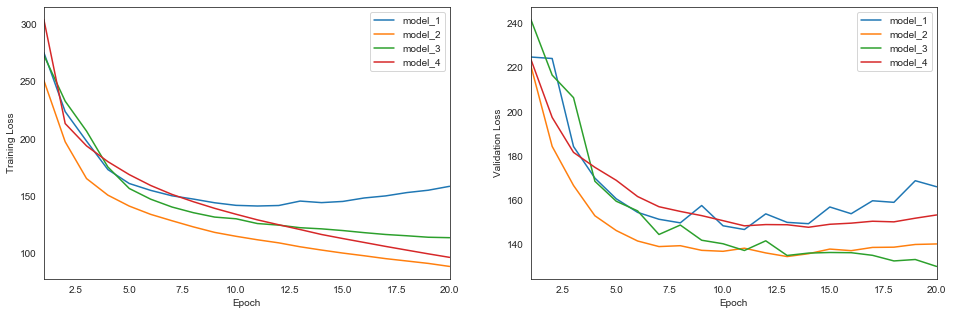

In [3]:
from glob import glob
import numpy as np
import _pickle as pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style(style='white')

# obtain the paths for the saved model history
all_pickles = sorted(glob("results/*.pickle"))
all_pickles = ['results/model_1.pickle',
 'results/model_2.pickle',
 'results/model_3.pickle',
 'results/model_4.pickle']
# extract the name of each model
model_names = [item[8:-7] for item in all_pickles]
# extract the loss history for each model
valid_loss = [pickle.load( open( i, "rb" ) )['val_loss'] for i in all_pickles]
train_loss = [pickle.load( open( i, "rb" ) )['loss'] for i in all_pickles]
# save the number of epochs used to train each model
num_epochs = [len(valid_loss[i]) for i in range(len(valid_loss))]

fig = plt.figure(figsize=(16,5))

# plot the training loss vs. epoch for each model
ax1 = fig.add_subplot(121)
for i in range(len(all_pickles)):
    ax1.plot(np.linspace(1, num_epochs[i], num_epochs[i]), 
            train_loss[i], label=model_names[i])
# clean up the plot
ax1.legend()  
ax1.set_xlim([1, max(num_epochs)])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')

# plot the validation loss vs. epoch for each model
ax2 = fig.add_subplot(122)
for i in range(len(all_pickles)):
    ax2.plot(np.linspace(1, num_epochs[i], num_epochs[i]), 
            valid_loss[i], label=model_names[i])
# clean up the plot
ax2.legend()  
ax2.set_xlim([1, max(num_epochs)])
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.show()

__Question 1:__ Use the plot above to analyze the performance of each of the attempted architectures.  Which performs best?  Provide an explanation regarding why you think some models perform better than others. 

__Answer:__

Model 0 is excluded from the graphs because it did far worse than others and would make it harder to see how other competing models do relative to each other. Among all the other models they all have similar performance for practical purposes. Model 1 has a strange behavior as its training loss seem to start to increase over time. Across validation losses we can see that 10-12 epoches is enough for training and beyond that we may start to overfit to the training data. 
I particularly like model 2 because it trained much faster than other models and it has a comparative performance against others. I should admit the keras documentation around Conv1D is very confusing. The best performing model is the deep RNN model. I would like to combine CNN + Deeper RNN for my final model based on the results above. 

<a id='final'></a>
### (IMPLEMENTATION) Final Model

Now that you've tried out many sample models, use what you've learned to draft your own architecture!  While your final acoustic model should not be identical to any of the architectures explored above, you are welcome to merely combine the explored layers above into a deeper architecture.  It is **NOT** necessary to include new layer types that were not explored in the notebook.

However, if you would like some ideas for even more layer types, check out these ideas for some additional, optional extensions to your model:

- If you notice your model is overfitting to the training dataset, consider adding **dropout**!  To add dropout to [recurrent layers](https://faroit.github.io/keras-docs/1.0.2/layers/recurrent/), pay special attention to the `dropout_W` and `dropout_U` arguments.  This [paper](http://arxiv.org/abs/1512.05287) may also provide some interesting theoretical background.
- If you choose to include a convolutional layer in your model, you may get better results by working with **dilated convolutions**.  If you choose to use dilated convolutions, make sure that you are able to accurately calculate the length of the acoustic model's output in the `model.output_length` lambda function.  You can read more about dilated convolutions in Google's [WaveNet paper](https://arxiv.org/abs/1609.03499).  For an example of a speech-to-text system that makes use of dilated convolutions, check out this GitHub [repository](https://github.com/buriburisuri/speech-to-text-wavenet).  You can work with dilated convolutions [in Keras](https://keras.io/layers/convolutional/) by paying special attention to the `padding` argument when you specify a convolutional layer.
- If your model makes use of convolutional layers, why not also experiment with adding **max pooling**?  Check out [this paper](https://arxiv.org/pdf/1701.02720.pdf) for example architecture that makes use of max pooling in an acoustic model.
- So far, you have experimented with a single bidirectional RNN layer.  Consider stacking the bidirectional layers, to produce a [deep bidirectional RNN](https://www.cs.toronto.edu/~graves/asru_2013.pdf)!

All models that you specify in this repository should have `output_length` defined as an attribute.  This attribute is a lambda function that maps the (temporal) length of the input acoustic features to the (temporal) length of the output softmax layer.  This function is used in the computation of CTC loss; to see this, look at the `add_ctc_loss` function in `train_utils.py`.  To see where the `output_length` attribute is defined for the models in the code, take a look at the `sample_models.py` file.  You will notice this line of code within most models:
```
model.output_length = lambda x: x
```
The acoustic model that incorporates a convolutional layer (`cnn_rnn_model`) has a line that is a bit different:
```
model.output_length = lambda x: cnn_output_length(
        x, kernel_size, conv_border_mode, conv_stride)
```

In the case of models that use purely recurrent layers, the lambda function is the identity function, as the recurrent layers do not modify the (temporal) length of their input tensors.  However, convolutional layers are more complicated and require a specialized function (`cnn_output_length` in `sample_models.py`) to determine the temporal length of their output.

You will have to add the `output_length` attribute to your final model before running the code cell below.  Feel free to use the `cnn_output_length` function, if it suits your model. 

In [7]:
# specify the model
model_end = final_model(input_dim=161,units=512,recur_layers=3) 

# model_end = model_4

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, None, 161)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 512)         907264    
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, None, 512)         0         
_________________________________________________________________
bn_conv_1d (BatchNormalizati (None, None, 512)         2048      
_________________________________________________________________
dropout_7 (Dropout)          (None, None, 512)         0         
_________________________________________________________________
bidirectional_15 (Bidirectio (None, None, 1024)        3148800   
_________________________________________________________________
batch_normalization_15 (Batc (None, None, 1024)        4096      
__________

Please execute the code cell below to train the neural network you specified in `input_to_softmax`.  After the model has finished training, the model is [saved](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model) in the HDF5 file `model_end.h5`.  The loss history is [saved](https://wiki.python.org/moin/UsingPickle) in `model_end.pickle`.  You are welcome to tweak any of the optional parameters while calling the `train_model` function, but this is not required.

In [ ]:
train_model(input_to_softmax=model_end, 
            pickle_path='model_end.pickle', 
            save_model_path='model_end.h5', 
            spectrogram=True) # change to False if you would like to use MFCC features

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/20
 71/101 [====================>.........] - ETA: 10s - loss: 666.4599

__Question 2:__ Describe your final model architecture and your reasoning at each step.  

__Answer:__

<a id='step3'></a>
## STEP 3: Obtain Predictions

We have written a function for you to decode the predictions of your acoustic model.  To use the function, please execute the code cell below.

In [5]:
import numpy as np
from data_generator import AudioGenerator
from keras import backend as K
from utils import int_sequence_to_text
from IPython.display import Audio

def get_predictions(index, partition, input_to_softmax, model_path):
    """ Print a model's decoded predictions
    Params:
        index (int): The example you would like to visualize
        partition (str): One of 'train' or 'validation'
        input_to_softmax (Model): The acoustic model
        model_path (str): Path to saved acoustic model's weights
    """
    # load the train and test data
    data_gen = AudioGenerator()
    data_gen.load_train_data()
    data_gen.load_validation_data()
    
    # obtain the true transcription and the audio features 
    if partition == 'validation':
        transcr = data_gen.valid_texts[index]
        audio_path = data_gen.valid_audio_paths[index]
        data_point = data_gen.normalize(data_gen.featurize(audio_path))
    elif partition == 'train':
        transcr = data_gen.train_texts[index]
        audio_path = data_gen.train_audio_paths[index]
        data_point = data_gen.normalize(data_gen.featurize(audio_path))
    else:
        raise Exception('Invalid partition!  Must be "train" or "validation"')
        
    # obtain and decode the acoustic model's predictions
    input_to_softmax.load_weights(model_path)
    prediction = input_to_softmax.predict(np.expand_dims(data_point, axis=0))
    output_length = [input_to_softmax.output_length(data_point.shape[0])] 
    pred_ints = (K.eval(K.ctc_decode(
                prediction, output_length)[0][0])+1).flatten().tolist()
    
    # play the audio file, and display the true and predicted transcriptions
    print('-'*80)
    Audio(audio_path)
    print('True transcription:\n' + '\n' + transcr)
    print('-'*80)
    print('Predicted transcription:\n' + '\n' + ''.join(int_sequence_to_text(pred_ints)))
    print('-'*80)

Use the code cell below to obtain the transcription predicted by your final model for the first example in the training dataset.

In [6]:
get_predictions(index=0, 
                partition='train',
                input_to_softmax=final_model(input_dim=161,units=200,recur_layers=2)  , 
                model_path='./results/model_end.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, None, 161)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 200)         354400    
_________________________________________________________________
average_pooling1d_2 (Average (None, None, 200)         0         
_________________________________________________________________
bn_conv_1d (BatchNormalizati (None, None, 200)         800       
_________________________________________________________________
0 (GRU)                      (None, None, 200)         240600    
_________________________________________________________________
batch_normalization_3 (Batch (None, None, 200)         800       
_________________________________________________________________
1 (GRU)                      (None, None, 200)         240600    
__________

Use the next code cell to visualize the model's prediction for the first example in the validation dataset.

In [7]:
get_predictions(index=0, 
                partition='validation',
                input_to_softmax=final_model(input_dim=161,units=200,recur_layers=2) , 
                model_path='./results/model_end.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, None, 161)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 200)         354400    
_________________________________________________________________
average_pooling1d_3 (Average (None, None, 200)         0         
_________________________________________________________________
bn_conv_1d (BatchNormalizati (None, None, 200)         800       
_________________________________________________________________
0 (GRU)                      (None, None, 200)         240600    
_________________________________________________________________
batch_normalization_5 (Batch (None, None, 200)         800       
_________________________________________________________________
1 (GRU)                      (None, None, 200)         240600    
__________

One standard way to improve the results of the decoder is to incorporate a language model.  We won't pursue this in the notebook, but you are welcome to do so as an _optional extension_. 

If you are interested in creating models that provide improved transcriptions, you are encouraged to download [more data](http://www.openslr.org/12/) and train bigger, deeper models.  But beware - the model will likely take a long while to train.  For instance, training this [state-of-the-art](https://arxiv.org/pdf/1512.02595v1.pdf) model would take 3-6 weeks on a single GPU!

# A lesson on 1 and 2D Conv in Keras
The keras documentation sucks big time so i including some examples here.
it seems the standard input in keras is of the following shape
`(batch_size, words or steps, channels or input dimension)`
for example in case of NLP, a sentence can be input to the model

`steps` = number of words in the sentence (usually padded to a max length)
`input_dimension` = size of word embedding vectors for example 128

in an image application (not entirely sure) 

`steps` = i think this might be number of pixels in an image
`input_dimension` = if it is an RGB image, the three color channels 

Assume an input/sentence of `(batch = 1, steps = 4 words, input_dimension = 5 integers embeddings per word)` if you apply :

`Conv1D(filters=3, kernel_size=1, kernel_initializer='ones')`

it will create a `(1, 5, 3)` tensor. Notice in conv1D there is no mention of 5 (input dimension). So when you say i want 3 filters of kernel size 1, it will create 3 filter of size 5 (channels) for you. so the Conv1D has 3x5 + 3 biases = 18 parameters. it will multiply (dot product) the first of these `(1x5)` filters with the first row/step/word-embedding of your input. This will generate one number. Then multiplies the other 2 filters with the first row/step/word-embedding and this will create 2 other numbers to build the first row of your ouput. Thus, The first row of output then has 3 elements. The same process if applied to second and third row/step/word-embedding in the input sentence. The final result is 1x4x3. 

`Conv1D(filters=3, kernel_size=2, kernel_initializer='ones')`

will create a tensor of shape `(2, 5, 3)`. This is very different from intuition. Intuitively you think if you increase kernal you are increasing the size of your filter by 1. In contrary this will add another dimension to your Conv tensor. 
Now, it seems from example below `(1, 5, 3)`  is applied to first row of input/senetnce generating 1 number, and the second `(1, 5, 3)` is applied to the second row of input/sentence generating the second number. The first and second number are added to gether to create the first element of the output. You can see the filter is now big enough to expand 2 words. So after repeating this the output has a shape of 1x3x3. if you use the same padding the input shape is changed to 
`(batch = 1, steps = 5 words, input_dimension = 5 integers embeddings per word)` where the last added word has only 0 embeddings. 

notice in the context of voice recognition as we increase the kernel length the output of 1D convultion becomes shorter and shorter compared to the input sequence length. it is like saying i input 20 second worth of recording but only get 15 seconds worth of output out of 1dConv with a larger kernel size (kernerl size of 6). This is when you use a `valid` padding, other wise you should get the same length with `same` padding


as shown max pooling decreases the size of steps by the pool_size=2 or more precisely steps from the previous layer // pool_size if the padding is `valid`

In [ ]:
from keras.layers import Conv1D, Conv2D
import keras.backend as K
import numpy as np
for kernel_size in [1,2]:
    # create an input with 4 steps and 5 channels/input_dim
    channels = 5 # each word is embedded by 5 numbers 
    steps = 4  # there are 4 words or 4 seconds worth of recording 
    filters = 3 
    # output would be of shape (batch_size, steps - kernel_size + 1, filters)
    # each filter has a shape of (1 x 5) , where 5 is the size of embedding
    val = np.array([list(range(i * channels, (i + 1) * channels)) for i in range(1, steps + 1)])
    val = np.expand_dims(val, axis=0)
    x = K.variable(value=val)

    # 1D convolution. Initialize the kernels to ones so that it's easier to compute the result by hand

    conv1d = Conv1D(filters=3, kernel_size=kernel_size, kernel_initializer='ones', padding='same')
    conv1d_imp = conv1d(x)

    # 2D convolution that replicates the 1D one

    # need to add a dimension to your input since conv2d expects 4D inputs. I add it at axis 4 since my keras is setup with `channel_last`
    val1 = np.expand_dims(val, axis=3)
    x1 = K.variable(value=val1)

    conv2d = Conv2D(filters=3, kernel_size=(kernel_size, 5), kernel_initializer='ones')(x1)

    # evaluate and print the outputs
    print("result with kernel size: ", kernel_size)
    print("shape of input \n", val.shape)
    print("input values \n", val)

    print("shape of the 1D conv \n", conv1d.get_weights()[0].shape)
    print("weights of 1D conv \n", conv1d.get_weights()[0])
    print("biases of 1D conv \n", conv1d.get_weights()[1])

    print("--------------")
    print("result with kernel size: ", kernel_size)
    print("1DCONV")
    print("shape of output of the 1D conv process \n", K.eval(conv1d_imp).shape)
    print("1DConv output \n", K.eval(conv1d_imp))
    print("--------------")


    print("--------------")
    print("2DCONV")
    print("2DConv output \n", K.eval(conv2d))
    print("--------------")

    if kernel_size == 1:
        print("--------------")
        print("result with kernel size: ", kernel_size)
        print("changing the weights of the 1Dconv manually") 
        conv1d.set_weights([np.array( [[[1., 2., 1.],[1., 2., 1.],[1., 2., 1.],[1., 2., 1.],[1., 2., 1.]]]),np.array([0, 0, 0])])
        conv1d_imp = conv1d(x)
        print("weights of 1D conv \n", conv1d.get_weights()[0])
        print("biases of 1D conv \n", conv1d.get_weights()[1])
        print("1DCONV")
        print("shape of output of the 1D conv process \n", K.eval(conv1d_imp).shape)
        print("1DConv output \n", K.eval(conv1d_imp))
        print("--------------")
        
        
    if kernel_size == 2:
        print("--------------")
        print("result with kernel size: ", kernel_size)
        print("changing the weights of the 1Dconv manually") 
        initial_value = np.ones(shape=(2,5,3))
        initial_value[1,:,1] = 2
        conv1d.set_weights([initial_value,np.array([0, 0, 0])])
        conv1d_imp = conv1d(x)
        print("weights of 1D conv \n", conv1d.get_weights()[0])
        print("biases of 1D conv \n", conv1d.get_weights()[1])
        print("1DCONV")
        print("shape of output of the 1D conv process \n", K.eval(conv1d_imp).shape)
        print("1DConv output \n", K.eval(conv1d_imp))
        print("--------------")

In [ ]:
print("sum of first words embedding elements")
5 + 6+ 7+ 8 + 9

In [ ]:
print("sum of second words embedding elements")
10 + 11+ 12+ 13 + 14

In [ ]:
print("sum of third words embedding elements")
15 + 16+ 17+ 18 + 19

In [ ]:
print("sum of forth words embedding elements")
20 + 21 + 22 + 23 + 24

In [18]:
from keras.layers import Conv1D, Conv2D, MaxPool1D, AveragePooling1D
import keras.backend as K
import numpy as np


# create an input with 4 steps and 5 channels/input_dim
channels = 5
steps = 4
filters = 3
kernel_size = 1
val = np.array([list(range(i * channels, (i + 1) * channels)) for i in range(1, steps + 1)])
val = np.expand_dims(val, axis=0)
x = K.variable(value=val)

# 1D convolution. Initialize the kernels to ones so that it's easier to compute the result by hand

conv1d = Conv1D(filters=3, kernel_size=kernel_size, kernel_initializer='ones', padding='valid')
conv1d_imp = conv1d(x)
pooled_layer = MaxPool1D(pool_size=3, strides=None, padding='valid', data_format='channels_last')(conv1d_imp)

# evaluate and print the outputs
print("result with kernel size: ", kernel_size)
print("shape of input \n", val.shape)
print("input values \n", val)

print("shape of the 1D conv \n", conv1d.get_weights()[0].shape)
print("weights of 1D conv \n", conv1d.get_weights()[0])
print("biases of 1D conv \n", conv1d.get_weights()[1])

print("--------------")
print("result with kernel size: ", kernel_size)
print("1DCONV")
print("shape of output of the 1D conv process \n", K.eval(conv1d_imp).shape)
print("1DConv output \n", K.eval(conv1d_imp))
print("max pooling output \n", K.eval(pooled_layer))
print("max pooling output shape \n", K.eval(pooled_layer).shape)
print("--------------")


result with kernel size:  1
shape of input 
 (1, 4, 5)
input values 
 [[[ 5  6  7  8  9]
  [10 11 12 13 14]
  [15 16 17 18 19]
  [20 21 22 23 24]]]
shape of the 1D conv 
 (1, 5, 3)
weights of 1D conv 
 [[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]
biases of 1D conv 
 [0. 0. 0.]
--------------
result with kernel size:  1
1DCONV
shape of output of the 1D conv process 
 (1, 4, 3)
1DConv output 
 [[[ 35.  35.  35.]
  [ 60.  60.  60.]
  [ 85.  85.  85.]
  [110. 110. 110.]]]
max pooling output 
 [[[85. 85. 85.]]]
max pooling output shape 
 (1, 1, 3)
--------------


# Keras Input API

Arguments to the Input: shape: defines the shape of a single sample, with variable batch size 

`#inp will be a tensor with shape (?, 28, 28)`

`inp = Input((28,28))`

in example below we do not know the steps/sequence/number-of-words/length-of-voice-recording in the input data

In [ ]:
from keras.layers import Input
Input(name='the_input', shape=(None, 10))

In [1]:
from keras.layers import (BatchNormalization, Conv1D, Dense, Input, 
    TimeDistributed, Activation, Bidirectional, SimpleRNN, GRU, LSTM, Dropout)
A = LSTM()

Using TensorFlow backend.
/home/pemfir/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pemfir/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pemfir/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np

TypeError: __init__() missing 1 required positional argument: 'units'